In [1]:
%pip install pandas numpy scikit seaborn matplotlib statsmodels scipy seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv('ARIMA.csv')
df.head()

,Month,Financial Year,Chain,Suburb,State,Country,Category,Sales
0,1/1/2016,2015/16,Fashion Direct,Albany,WA,Australia,Womens,8497.10
1,1/1/2016,2015/16,Fashion Direct,Alexandria,NSW,Australia,Womens,8022.13
2,1/1/2016,2015/16,Fashion Direct,Altona,VIC,Australia,Womens,7171.79
3,1/1/2016,2015/16,Fashion Direct,Armidale,NSW,Australia,Womens,6097.48
4,1/1/2016,2015/16,Fashion Direct,Ballarat,VIC,Australia,Womens,6048.55


In [7]:
albany = df[df['State'] == 'NSW']
albany['Month'] = pd.to_datetime(albany['Month'])

missing_values = albany.isnull().sum()

summary = albany.describe()

missing_values, summary

C:\Users\Ilzam\AppData\Local\Temp\ipykernel_48552\172416401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany['Month'] = pd.to_datetime(albany['Month'])


(Month             0
 Financial Year    0
 Chain             0
 Suburb            0
 State             0
 Country           0
 Category          0
 Sales             0
 dtype: int64,
               Sales
 count    247.000000
 mean    6196.161377
 std     2363.337834
 min     2175.420000
 25%     4530.990000
 50%     5631.520000
 75%     7371.770000
 max    15261.360000)

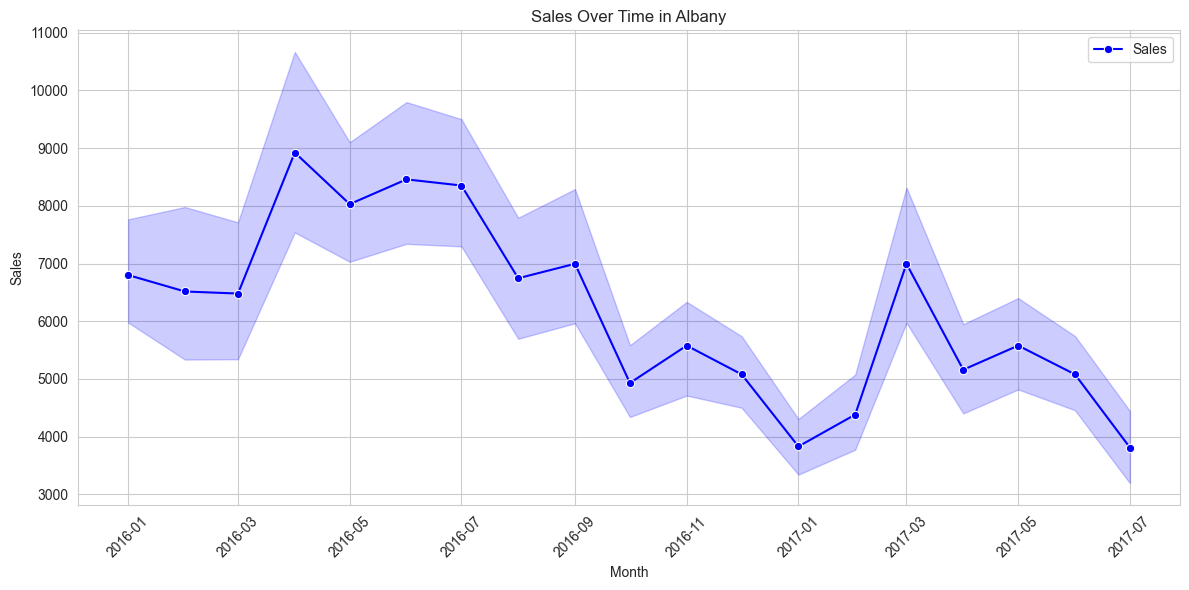

In [8]:
# Plotting sales over time for Albany
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=albany, marker='o', color='blue', label='Sales')
plt.title('Sales Over Time in Albany')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

# Assuming `sales` is your time series column
adf_result = adfuller(albany['Sales'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -1.115682
p-value: 0.708778


ADF Statistic: A more negative value suggests stronger evidence against the null hypothesis (the series is non-stationary).
p-value: If this value is less than a threshold (usually 0.05), you reject the null hypothesis, indicating the presence of a trend.

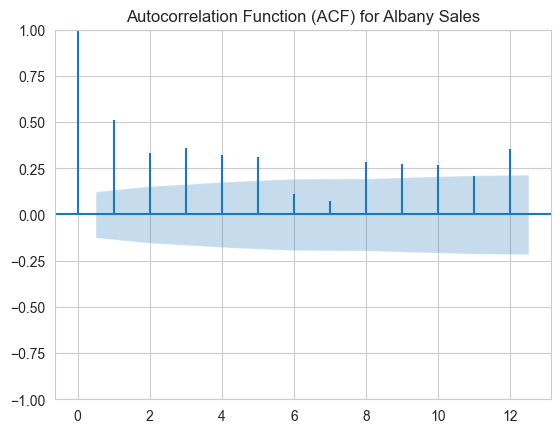

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Perform ACF
plot_acf(albany['Sales'], lags=12, use_vlines=True, marker=None)
plt.title('Autocorrelation Function (ACF) for Albany Sales')
plt.show()

d:\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


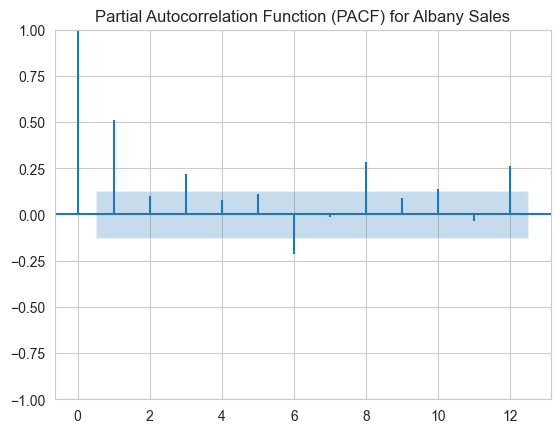

In [13]:
# Perform PACF
plot_pacf(albany['Sales'], lags=12, use_vlines=True, marker=None)
plt.title('Partial Autocorrelation Function (PACF) for Albany Sales')
plt.show()

In [14]:
%pip install pmdarima 


   ---------------------------------------- 0.0/615.0 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/615.0 kB 2.6 MB/s eta 0:00:01
   --------- ------------------------------ 153.6/615.0 kB 2.3 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/615.0 kB 2.6 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/615.0 kB 2.8 MB/s eta 0:00:01
   ------------------------------------ --- 563.2/615.0 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 615.0/615.0 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.8 MB 4.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/2.8 MB 4.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/2.8 MB 4.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/2.8 MB 4.2 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.8 MB 2.2 MB/s eta 0:00:02
